In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

df = pd.read_csv('players_22.csv', low_memory=False)

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [4]:
df = df[['short_name', 'age', 'nationality_name', 'overall', 'potential',
         'club_name', 'value_eur', 'wage_eur', 'player_positions']]

In [5]:
# selecting only one position
df['player_positions'] = df['player_positions'].str.split(',', expand=True)[0]

# dropping nan
df.dropna(inplace=True)

In [6]:
# dropping injured players
players_missing_worldcup = ['K. Benzema', 'S. Mané', 'S. Agüero', 'Sergio Ramos', 'P. Pogba',
                            'M. Reus', 'Diogo Jota', 'A. Harit', 'N. Kanté', 'G. Lo Celso', 'Piqué']

drop_index = df[df['short_name'].isin(players_missing_worldcup)].index
df.drop(drop_index, axis=0, inplace=True)

# filtering only national teams in the world cup
teams_worldcup = [
    'Qatar', 'Brazil', 'Belgium', 'France', 'Argentina', 'England', 'Spain', 'Portugal',
    'Mexico', 'Netherlands', 'Denmark', 'Germany', 'Uruguay', 'Switzerland', 'United States', 'Croatia',
    'Senegal', 'Iran', 'Japan', 'Morocco', 'Serbia', 'Poland', 'South Korea', 'Tunisia',
    'Cameroon', 'Canada', 'Ecuador', 'Saudi Arabia', 'Ghana', 'Wales', 'Costa Rica', 'Australia'
]

df = df[df['nationality_name'].isin(teams_worldcup)]

In [9]:
df.sort_values(by=['overall', 'potential', 'value_eur'], ascending=False, inplace=True)

In [10]:
df

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
6,K. Mbappé,22,France,91,95,Paris Saint-Germain,194000000.0,230000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM
...,...,...,...,...,...,...,...,...,...
19183,F. Emmings,17,United States,48,73,Minnesota United FC,130000.0,500.0,GK
19197,J. Neal,17,United States,48,69,LA Galaxy,140000.0,500.0,CB
19216,H. Wiles-Richards,19,England,48,65,Bristol City,110000.0,1000.0,GK
19217,J. Affonso,23,Uruguay,48,55,Cerro Largo Fútbol Club,90000.0,500.0,CM


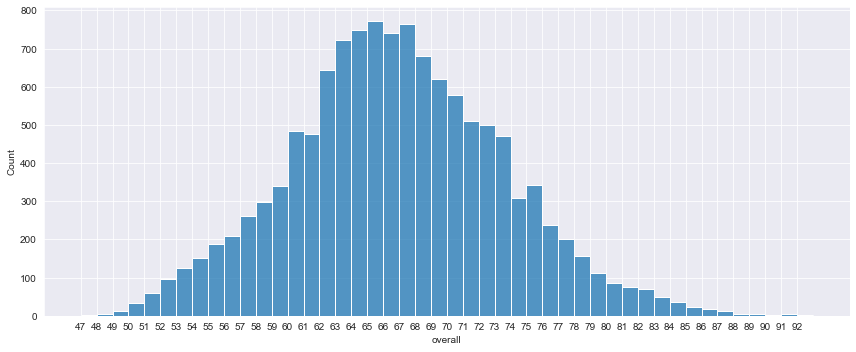

In [11]:
import numpy as np
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)

sns.histplot(df, x='overall', binwidth=1)

bins = np.arange(df['overall'].min(), df['overall'].max(), 1)
plt.xticks(bins)
plt.show()

In [12]:
df.drop_duplicates('player_positions')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM
8,M. ter Stegen,29,Germany,90,92,FC Barcelona,99000000.0,250000.0,GK
19,J. Kimmich,26,Germany,89,90,FC Bayern München,108000000.0,160000.0,CDM
15,V. van Dijk,29,Netherlands,89,89,Liverpool,86000000.0,230000.0,CB
28,Bruno Fernandes,26,Portugal,88,89,Manchester United,107500000.0,250000.0,CAM
44,T. Alexander-Arnold,22,England,87,92,Liverpool,114000000.0,150000.0,RB
45,J. Sancho,21,England,87,91,Manchester United,116500000.0,150000.0,RM


In [13]:
df_best_players = df.copy()
df_best_players = df_best_players.drop_duplicates('nationality_name').reset_index(drop=True)
country_short =  df_best_players['nationality_name'].str.extract('(^\w{3})', expand=False).str.upper()
df_best_players['name_nationality'] = df_best_players['short_name'] +' (' + country_short + ')'

In [16]:
df_best_players['name_nationality']

0                L. Messi (ARG)
1          R. Lewandowski (POL)
2               K. Mbappé (FRA)
3               Neymar Jr (BRA)
4            K. De Bruyne (BEL)
5       Cristiano Ronaldo (POR)
6           M. ter Stegen (GER)
7                 H. Kane (ENG)
8             V. van Dijk (NET)
9               L. Suárez (URU)
10               K. Navas (COS)
11              L. Modrić (CRO)
12        Marcos Llorente (SPA)
13           K. Koulibaly (SEN)
14              A. Hakimi (MOR)
15    S. Milinković-Savić (SER)
16              Y. Sommer (SWI)
17          K. Schmeichel (DEN)
18              T. Partey (GHA)
19             R. Jiménez (MEX)
20               J. Matip (CAM)
21              A. Davies (CAN)
22             C. Pulisic (UNI)
23                G. Bale (WAL)
24           P. Estupiñán (ECU)
25              D. Kamada (JAP)
26              M. Taremi (IRA)
27              E. Skhiri (TUN)
28                M. Ryan (AUS)
29          S. Al Dawsari (SAU)
Name: name_nationality, dtype: object

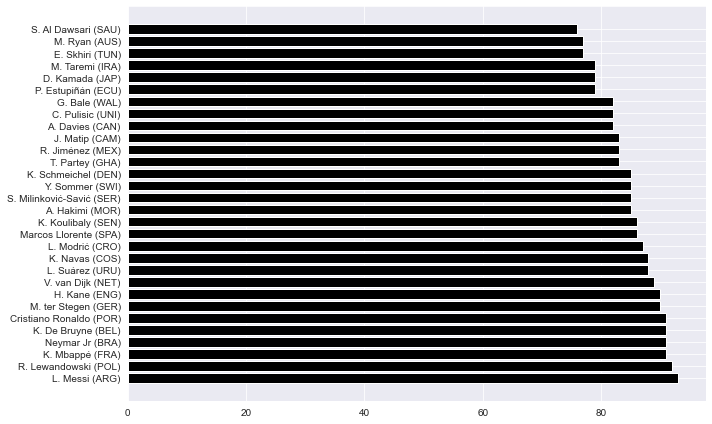

In [30]:
fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)
plt.barh( df_best_players['name_nationality'],df_best_players['overall'], color ='black')

plt.show()

In [18]:
def best_squad(nationality):
    df_best_squad = df.copy()
    df_best_squad = df_best_squad.groupby(['nationality_name', 'player_positions']).head(2)
    df_best_squad = df_best_squad[df_best_squad['nationality_name']==nationality].sort_values(['player_positions', 'overall', 'potential'], ascending=False)
    return df_best_squad

In [19]:
best_squad('Brazil')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
191,Gabriel Jesus,24,Brazil,83,87,Manchester City,52500000.0,150000.0,ST
268,Richarlison,24,Brazil,82,87,Everton,46500000.0,100000.0,ST
5069,Paolinho Leima,21,Brazil,70,70,Clube Atlético Mineiro,1700000.0,12000.0,RWB
8031,Jadenilson Baia,33,Brazil,67,67,Sport Club Corinthians Paulista,525000.0,9000.0,RWB
662,Antony,21,Brazil,79,88,Ajax,39500000.0,17000.0,RW
656,Rodrygo,20,Brazil,79,88,Real Madrid CF,38500000.0,115000.0,RW
271,Raphinha,24,Brazil,82,87,Leeds United,46000000.0,89000.0,RM
318,Lucas Moura,28,Brazil,81,81,Tottenham Hotspur,26000000.0,105000.0,RM
311,Danilo,29,Brazil,81,81,Juventus,22500000.0,83000.0,RB
484,Maikel Catarino,25,Brazil,80,80,Sport Club Corinthians Paulista,21000000.0,33000.0,RB


In [20]:
average_overall = [best_squad(team)['overall'].mean() for team in teams_worldcup]

df_average_overall = pd.DataFrame({'Teams': teams_worldcup, 'AVG_Overall': average_overall})
df_average_overall = df_average_overall.dropna()
df_average_overall = df_average_overall.sort_values('AVG_Overall', ascending=False)
df_average_overall

,Teams,AVG_Overall
6,Spain,82.400000
7,Portugal,81.733333
5,England,81.700000
1,Brazil,81.666667
3,France,81.000000
4,Argentina,80.566667
11,Germany,80.433333
2,Belgium,79.034483
9,Netherlands,78.758621
8,Mexico,77.727273


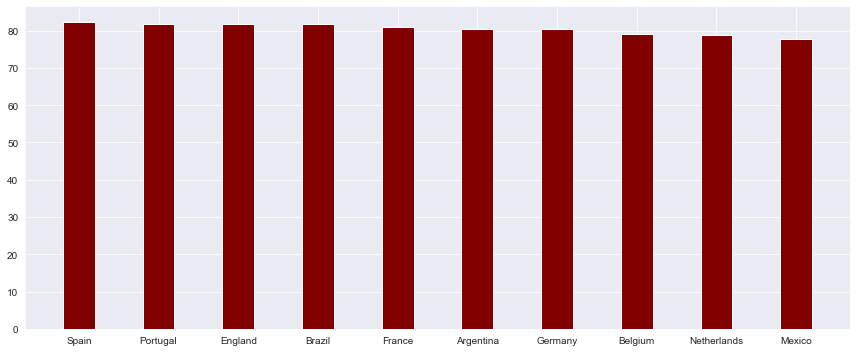

In [25]:
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)
plt.bar(df_average_overall['Teams'].head(10), df_average_overall['AVG_Overall'].head(10), color ='maroon',
        width = 0.4)

plt.show()

In [31]:
dict_formation = {
    '4-3-3': ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW'],
    '4-4-2': ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST'],
    '4-2-3-1': ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST'],
}

In [32]:
def best_lineup(nationality, lineup):
    lineup_count = [lineup.count(i) for i in lineup]

    df_lineup = pd.DataFrame({'position': lineup, 'count': lineup_count})
    positions_non_repeated = df_lineup[df_lineup['count'] <= 1]['position'].values
    positions_repeated = df_lineup[df_lineup['count'] > 1]['position'].values

    df_squad = best_squad(nationality)

    df_lineup = pd.concat([
        df_squad[df_squad['player_positions'].isin(positions_non_repeated)].drop_duplicates('player_positions', keep='first'),
        df_squad[df_squad['player_positions'].isin(positions_repeated)]]
    )
    return df_lineup[['short_name', 'overall', 'club_name', 'player_positions']]

In [33]:
for index, row in df_average_overall[:7].iterrows():
    max_average = None
    for key, values in dict_formation.items():
        average = best_lineup(row['Teams'], values)['overall'].mean()
        if max_average is None or average>max_average:
            max_average = average
            formation = key
    print(row['Teams'], formation, max_average)

Spain 4-2-3-1 85.1
Portugal 4-2-3-1 84.9
England 4-4-2 84.45454545454545
Brazil 4-3-3 84.81818181818181
France 4-2-3-1 83.9
Argentina 4-3-3 83.54545454545455
Germany 4-2-3-1 84.1


In [34]:
best_lineup('Spain', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
59,Gerard Moreno,86,Villarreal CF,ST
87,Carvajal,85,Real Madrid CF,RB
50,Jordi Alba,86,FC Barcelona,LB
106,De Gea,84,Manchester United,GK
67,Rodri,86,Manchester City,CDM
52,Sergio Busquets,86,FC Barcelona,CDM
63,A. Laporte,86,Manchester City,CB
148,Azpilicueta,83,Chelsea,CB
72,David Silva,85,Real Sociedad,CAM
108,Luis Alberto,84,Lazio,CAM


In [35]:
best_lineup('Portugal', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
2,Cristiano Ronaldo,91,Manchester United,ST
62,João Cancelo,86,Manchester City,RB
124,R. Guerreiro,84,Borussia Dortmund,LB
226,A. Lopes,82,Olympique Lyonnais,GK
260,Palhinha,82,Sporting CP,CDM
317,Danilo Pereira,81,Paris Saint-Germain,CDM
46,Rúben Dias,87,Manchester City,CB
199,Pepe,82,FC Porto,CB
28,Bruno Fernandes,88,Manchester United,CAM
65,Bernardo Silva,86,Manchester City,CAM


In [36]:
best_lineup('England', dict_formation['4-4-2'])

,short_name,overall,club_name,player_positions
45,J. Sancho,87,Manchester United,RM
44,T. Alexander-Arnold,87,Liverpool,RB
94,M. Rashford,85,Manchester United,LM
117,L. Shaw,84,Manchester United,LB
169,J. Pickford,83,Everton,GK
9,H. Kane,90,Tottenham Hotspur,ST
60,J. Vardy,86,Leicester City,ST
327,J. Ward-Prowse,81,Southampton,CM
661,J. Bellingham,79,Borussia Dortmund,CM
114,H. Maguire,84,Manchester United,CB


In [37]:
best_lineup('Brazil', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
191,Gabriel Jesus,83,Manchester City,ST
662,Antony,79,Ajax,RW
311,Danilo,81,Juventus,RB
3,Neymar Jr,91,Paris Saint-Germain,LW
153,Alex Sandro,83,Juventus,LB
18,Ederson,89,Manchester City,GK
190,Arthur,83,Juventus,CM
14,Casemiro,89,Real Madrid CF,CDM
189,Ronaldo Cabrais,83,Grêmio,CAM
39,Marquinhos,87,Paris Saint-Germain,CB


In [38]:
best_lineup('France', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
6,K. Mbappé,91,Paris Saint-Germain,ST
621,B. Pavard,79,FC Bayern München,RB
137,T. Hernández,84,AC Milan,LB
31,H. Lloris,87,Tottenham Hotspur,GK
229,J. Veretout,82,Roma,CDM
301,B. André,81,LOSC Lille,CDM
57,R. Varane,86,Manchester United,CB
197,J. Koundé,83,Sevilla FC,CB
131,N. Fekir,84,Real Betis Balompié,CAM
277,T. Ndombele,82,Tottenham Hotspur,CAM


In [39]:
best_lineup('Argentina', dict_formation['4-3-3'])

,short_name,overall,club_name,player_positions
93,L. Martínez,85,Inter,ST
0,L. Messi,93,Paris Saint-Germain,RW
818,G. Montiel,78,Sevilla FC,RB
171,L. Ocampos,83,Sevilla FC,LW
134,M. Acuña,84,Sevilla FC,LB
113,E. Martínez,84,Aston Villa,GK
247,R. De Paul,82,Atlético de Madrid,CM
206,É. Banega,82,Al Shabab,CDM
69,A. Gómez,85,Sevilla FC,CAM
269,C. Romero,82,Tottenham Hotspur,CB


In [40]:
best_lineup('Germany', dict_formation['4-2-3-1'])

,short_name,overall,club_name,player_positions
126,T. Werner,84,Chelsea,ST
1357,B. Henrichs,76,RB Leipzig,RB
450,P. Max,80,PSV,LB
8,M. ter Stegen,90,FC Barcelona,GK
19,J. Kimmich,89,FC Bayern München,CDM
330,M. Arnold,81,VfL Wolfsburg,CDM
49,M. Hummels,86,Borussia Dortmund,CB
119,M. Ginter,84,Borussia Mönchengladbach,CB
35,T. Müller,87,FC Bayern München,CAM
138,K. Havertz,84,Chelsea,CAM
